In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import datetime
from pandas_datareader import data as pdr
import ivolat3

In [41]:
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2019,1,1)
end = datetime.date.today()

# use quandl for american stocks

# use datareader for european stocks
besi = pdr.DataReader('BESI.AS','yahoo',start,end)
sp500 = pdr.DataReader('^GSPC','yahoo',start,end)


In [59]:
besi_stock =pd.DataFrame({
    'BESI Close': besi['Adj Close']
})
sig =np.std(besi_stock)
sig

BESI Close    2.364528
dtype: float64

In [43]:
sp500_df = pd.DataFrame({
    "SP500 Adj Close":sp500['Adj Close']
})

In [60]:
s = besi_stock.iloc[-1]
k = 22
r = 0.003
q = 0.1
t = 14/365
sigma = sig


In [61]:
p = ivolat3.prem_call(s,k,r,q,t,sigma)
p

3.2507434965614976

In [62]:
ivolat3.ivolat_call(s, k, r, q, t, p)

2.3645280998812397

In [64]:
c =besi_stock.mean()

In [65]:
c+ivolat3.ivolat_call(s, k, r, q, t, p)

BESI Close    23.994615
dtype: float64

In [66]:
c-ivolat3.ivolat_call(s, k, r, q, t, p)

BESI Close    19.265559
dtype: float64

(array([0.00551352, 0.        , 0.00551352, 0.        , 0.00551352,
        0.01102704, 0.02205407, 0.01654055, 0.03308111, 0.02205407,
        0.04410814, 0.02205407, 0.07718925, 0.05513518, 0.13783795,
        0.06616222, 0.09924332, 0.12681091, 0.11578388, 0.14886499,
        0.14335147, 0.22054072, 0.16540554, 0.15989202, 0.19848665,
        0.14886499, 0.14335147, 0.19848665, 0.19848665, 0.13232443,
        0.10475684, 0.11027036, 0.12681091, 0.12681091, 0.07718925,
        0.06616222, 0.04410814, 0.04410814, 0.02205407, 0.02756759,
        0.02205407, 0.03859463, 0.00551352, 0.00551352, 0.01102704,
        0.00551352, 0.00551352, 0.00551352, 0.00551352, 0.00551352]),
 array([14.69300695, 14.97204141, 15.25107588, 15.53011034, 15.80914481,
        16.08817927, 16.36721373, 16.6462482 , 16.92528266, 17.20431713,
        17.48335159, 17.76238605, 18.04142052, 18.32045498, 18.59948945,
        18.87852391, 19.15755838, 19.43659284, 19.7156273 , 19.99466177,
        20.27369623, 20.55

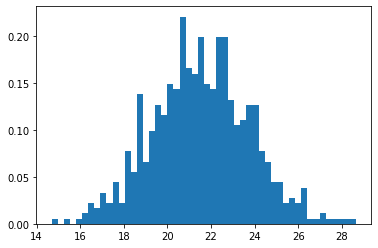

In [84]:
mu = c


d = np.random.normal(mu,sigma,650)
plt.hist(d, 50, density=True)

In [81]:
vv =0.00442325+ 0.00884651+ 0.00884651+0.00442325+0.00884651+0.00884651+ 0.02211627+ 0.01326976+ 0.0486558 + 0.03096278+0.08846509+ 0.08404184+ 0.0530790

vv

0.38482308